In [45]:
import data.audio_dataset_v1 as data_utils
import models.inversion_v1 as model_utils
from abstract_model import AbstractModel

import torch
import torch.nn as nn
from torch import optim

from argparse import Namespace
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger

from ipywidgets import IntProgress

import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
AudioDataset = data_utils.AudioDataset
InversionV1 = model_utils.InversionV1

In [47]:
data_paths = {}
data_paths['train'] = '/scratch/prs392/incubator/data/LibriSpeech/train-clean-360'
data_paths['val'] = '/scratch/prs392/incubator/data/LibriSpeech/dev-clean'
data_paths['test'] = '/scratch/prs392/incubator/data/LibriSpeech/test-clean'

def optimizer(model_parameters, hparams):
    optimizer = optim.SGD(model_parameters, lr=hparams.lr)
    scheduler = optim.lr_scheduler.StepLR(optimizer, hparams.scheduler_epoch, hparams.scheduler_step_size)
    return [optimizer], [scheduler]

args = {
    'batch_size': 32, # Compulsory
    'lr': 0.0002, # Compulsory
    'scheduler_epoch': 3, # Compulsory
    'scheduler_step_size': 0.1 # Compulsory
}

hparams = Namespace(**args)

In [48]:
model = AbstractModel(
    hparams=hparams,
    data_paths = data_paths, 
    dataset_model = AudioDataset,
    model = InversionV1(), 
    criterion = nn.MSELoss(),
    optimizer = optimizer
)

model = AbstractModel.load_from_checkpoint('/scratch/prs392/incubator/checkpoints/openl3_librispeech/inversion_v1/no_optimization/version_0/checkpoints/epoch=6.ckpt', 
                                            data_paths = data_paths, 
                                            dataset_model = AudioDataset,
                                            model = InversionV1()
                                          )


In [49]:
audio_dataset = AudioDataset(root_dir='/scratch/prs392/incubator/data/LibriSpeech/train-clean-360')

specs = []
preds = []

for i in range(len(audio_dataset)):
    emb, spec, j = audio_dataset[i]
    specs.append(spec)
#     print(emb.shape, spec.shape, j)
    pred = model(emb)
    preds.append(pred)
#     print("Embeddings shape: " + str(emb.shape))
#     print("Expected Spectrogram shape: " + str(spec.shape))
#     print("Predicted Spectrogram shape: " + str(pred.shape))
    if i == 9:
        break

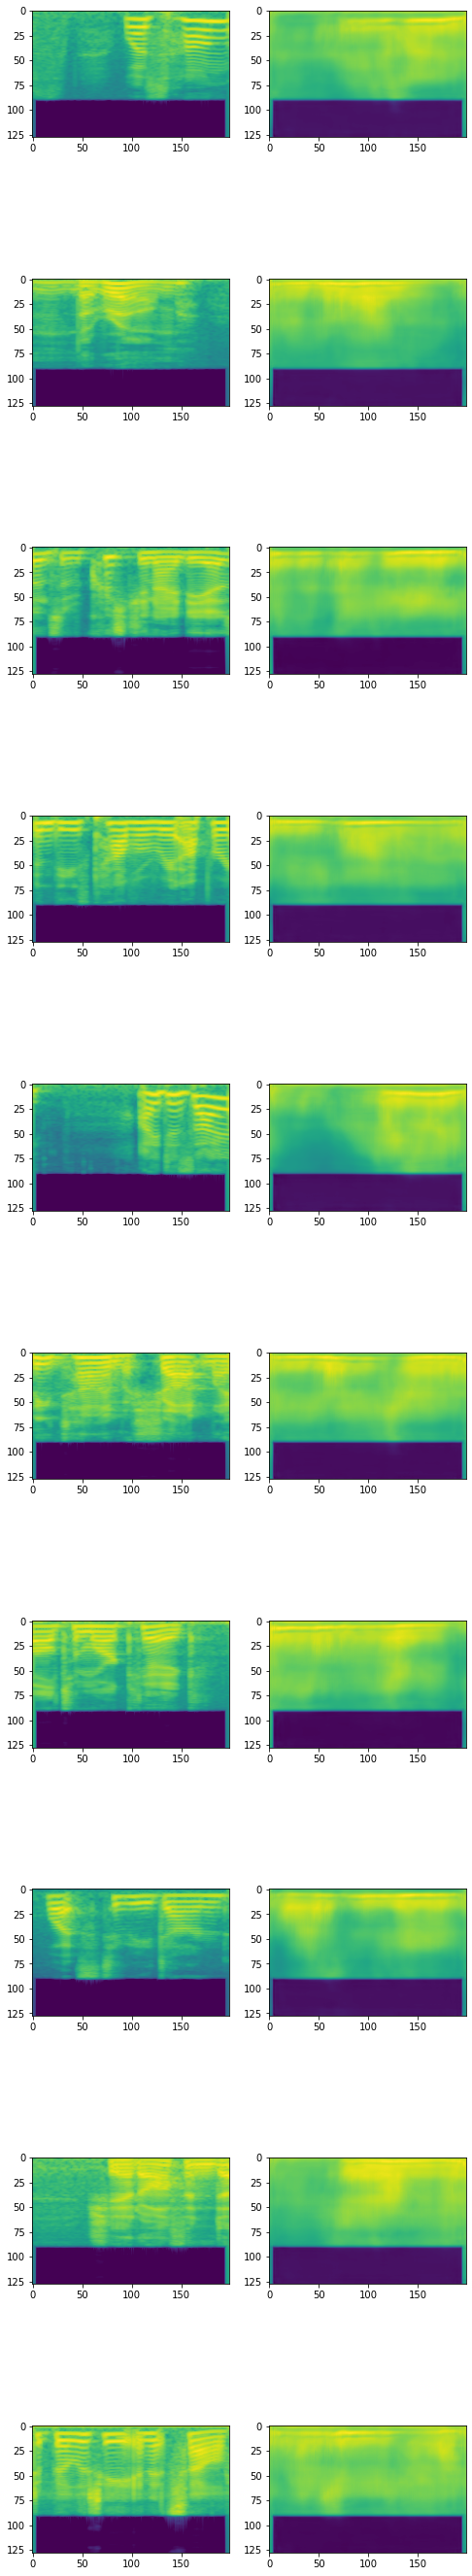

In [50]:
f, axarr = plt.subplots(10,2, figsize=(8, 50))
for i in range(10):
    axarr[i,0].imshow(specs[i][0,:,:].numpy())
    axarr[i,1].imshow(preds[i][0, 0,:,:].detach().numpy())

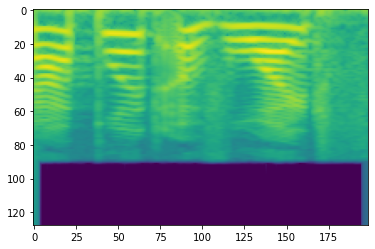

In [31]:
plt.figure()
p = plt.imshow(spec[0,:,:].numpy())

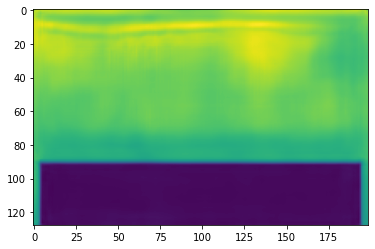

In [32]:
p = plt.imshow(pred[0, 0,:,:].detach().numpy())

In [29]:
spec

tensor([[[-16.5221, -16.6524, -17.5007,  ..., -19.7584, -20.1810, -20.0697],
         [-16.9612, -17.6526, -19.8212,  ..., -22.7224, -21.9725, -20.5644],
         [-17.0911, -17.9226, -20.3717,  ..., -22.9615, -21.1563, -19.9463],
         ...,
         [-35.6173, -36.4535, -38.8064,  ..., -48.0157, -45.6708, -44.8400],
         [-35.6370, -36.4733, -38.8262,  ..., -48.0345, -45.6896, -44.8588],
         [-35.6492, -36.4855, -38.8384,  ..., -48.0461, -45.7011, -44.8704]]])

In [23]:
pred

tensor([[[[-21.9218, -17.8793, -16.3545,  ..., -21.5108, -20.4367, -23.0141],
          [-18.0378, -15.8228, -17.0104,  ..., -22.0500, -19.3646, -19.5670],
          [-17.9461, -17.3629, -19.4331,  ..., -21.6130, -19.8035, -19.0649],
          ...,
          [-36.8033, -36.3494, -38.6177,  ..., -38.0943, -36.1596, -37.0169],
          [-37.4935, -36.3738, -38.1926,  ..., -37.5178, -35.7747, -36.9627],
          [-40.2298, -38.5009, -40.8946,  ..., -40.1349, -39.0538, -39.5366]]]],
       grad_fn=<NativeBatchNormBackward>)